# 군집화 실습

   #### 레이블 데이터가 없는 경우 사용되는 기계학습 방법인 비지도 학습(군집화) 알고리즘을 실습한다
   
   #### 학습 알고리즘은 아래와 같이 2가지 이다.
   #### 1) K-means Clustering
   #### 2) Hierachical Clustering

# 군집화(Clustering) 환경 설정

In [4]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import mglearn

# 인공 데이터

#### 1) Well-seperated Dataset
#### 2) Seperated Dataset
#### 3) Two moon

In [7]:
# 데이터 정규화
def standardization(Data):
    Input = ((Data[['X','Y']] - np.mean(Data[['X','Y']], axis = 0)) / np.std(Data[['X','Y']], axis=0))
    return (pd.concat([Input, Data['Class']], axis = 1))

In [10]:
# 데이터 로드
WellSeparated = standardization(pd.read_csv('./well-separated dataset.csv'))
Twomoon = standardization(pd.read_csv('./Twomoon dataset.csv'))
Separated = standardization(pd.read_csv('./Seperated dataset.csv'))

In [11]:
WellSeparated.head()

,X,Y,Class
0,-1.065202,1.300628,1
1,-0.991417,1.194477,1
2,-1.047240,1.834586,1
3,-1.096424,1.995751,1
4,-1.028580,1.834538,1


In [12]:
Artificial_Dataset = {'WellSeparated' : WellSeparated, "Twomoon" : Twomoon, "Separated":Separated}

In [16]:
# 데이터 요약정보 프린트
def Data_Info(Data,NAME):
    print(NAME, "=", 'nrow', np.shape(Data)[0], '/ ncol : ', np.shape(Data)[1]
         , "/ Class : ", Data.iloc[:,2].nunique())

print("각각의 2차원 데이터 개수는 아래와 같음")
for name in Artificial_Dataset.keys():
    Data_Info(Artificial_Dataset[name], name)
    

각각의 2차원 데이터 개수는 아래와 같음
WellSeparated = nrow 500 / ncol :  3 / Class :  5
Twomoon = nrow 600 / ncol :  3 / Class :  2
Separated = nrow 600 / ncol :  3 / Class :  3


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

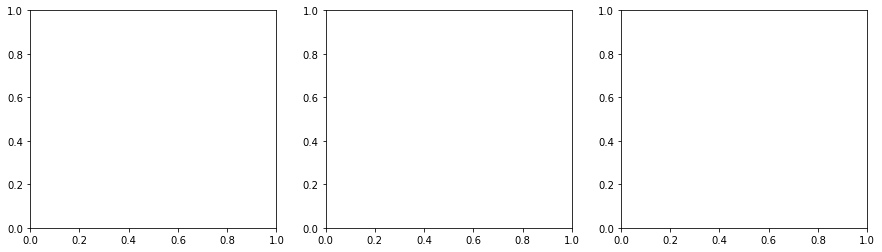

In [38]:
# 가상의 데이터 셋 3가지 그래프
fig, axes = plt.subplots(1,3, figsize = (15,4))

i = ()
for name in Artificial_Dataset.keys():
    Data = Artificial_Dataset[name]
    mglearn.discrete_scatter(Data['X'], Data['Y'], Data['Class'], ax = axes[i], s=5)
    axes[i].set_title("Data : " + name)
    i+=1

# K-Means Clustering

## 1. K-Means 알고리즘 학습 예시

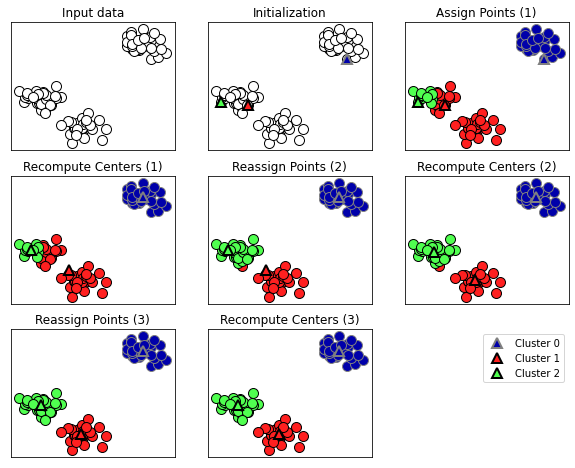

In [18]:
mglearn.plots.plot_kmeans_algorithm()

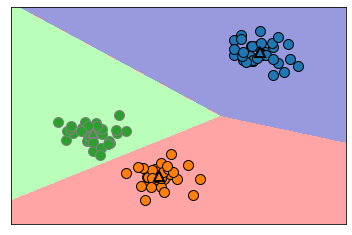

In [19]:
mglearn.plots.plot_kmeans_boundaries()

----
## K-Means Clustering

In [20]:
Kmeans_Clustering = KMeans()
# 옵션? -> 우리는 디폴트로 하자.(k, 군집 수 마저도 디폴트로 지정이 되어 있음.)

## KMeans의 Parameter

#### 1) n_clusters : 군집 수 (Default = 8) -> 우리의 Hyper-Parameter
#### 2) init : 초기 중심 값에 대해 어떻게 할 것인지에 대한 내용(k-means++ or random)
* k-means++ : Smart한 방법으로 최적의 중심을 찾겠다
* random : 말그대로 랜덤하게 Select 함

#### 3) n_init : 초기 중심 선정을 여러번 하겠다 (Cluster의 횟수이기도 함)
#### 4) max_iter
#### 5) tol
#### 6) random_state
#### 7) algorithm : auto, full, elkon
----
## 속성 값 어떻게 얻나?

#### 1) cluster_centers_ : 중심값
#### 2) labels
#### 3) inertia(관성)

In [26]:
Kmeans_Clustering.fit(WellSeparated[['X','Y']]) # class 필드 제외한 것을 학습

KMeans()

In [31]:
Kmeans_Clustering.cluster_centers_

array([[-1.0306253 , -1.19351931],
       [ 0.74612231, -0.76691529],
       [-1.04476836,  1.90633391],
       [-0.12982074,  0.15599334],
       [ 1.47951242,  0.15277683],
       [ 0.7449964 , -1.13344411],
       [-1.04278739,  1.48005485],
       [-1.07344942, -0.81970836]])

In [33]:
Kmeans_Clustering.labels_.shape

(500,)

In [34]:
Kmeans_Clustering.inertia_

19.22662289373166

In [35]:
Kmeans_Clustering = KMeans(n_clusters = 5, verbose = 1) # verbose는 학습 과정을 보여줌
Kmeans_Clustering.fit(WellSeparated[['X','Y']])

Initialization complete
Iteration 0, inertia 46.43032052503023
Iteration 1, inertia 30.54430767241522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 57.12108000172392
Iteration 1, inertia 30.54430767241522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 65.37265785468632
Iteration 1, inertia 30.593514196716633
Iteration 2, inertia 30.54430767241522
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 48.60993603997523
Iteration 1, inertia 30.54430767241522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 49.16227691837325
Iteration 1, inertia 30.54430767241522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 81.25685528539758
Iteration 1, inertia 30.54430767241522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 105.42224651849284
Iteratio

KMeans(n_clusters=5, verbose=1)

In [36]:
Kmeans_Clustering.inertia_

30.54430767241522

In [39]:
#Kmeans_Clusterings.predict()도 가능!

In [40]:
Kmeans_Clustering1 = KMeans(n_clusters = 8)
Kmeans_Clustering2 = KMeans(n_clusters = 10)
Kmeans_Clustering3 = KMeans(n_clusters = 5)

Kmeans_Clustering1.fit(WellSeparated[['X','Y']])
Kmeans_Clustering2.fit(WellSeparated[['X','Y']])
Kmeans_Clustering3.fit(WellSeparated[['X','Y']])

KMeans(n_clusters=5)

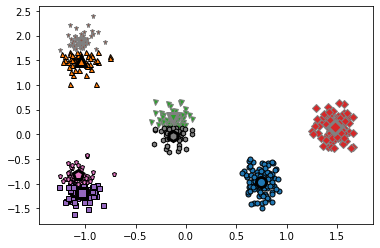

In [43]:
mglearn.discrete_scatter(WellSeparated['X'], WellSeparated['Y'], Kmeans_Clustering1.labels_ , s=5);
mglearn.discrete_scatter(Kmeans_Clustering1.cluster_centers_[:,0],
                        Kmeans_Clustering1.cluster_centers_[:,1], list(range(8)),
                        markeredgewidth=3, s= 10);

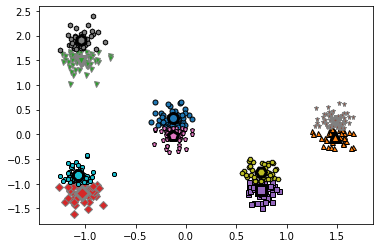

In [45]:
mglearn.discrete_scatter(WellSeparated['X'], WellSeparated['Y'], Kmeans_Clustering2.labels_ , s=5);
mglearn.discrete_scatter(Kmeans_Clustering2.cluster_centers_[:,0],
                        Kmeans_Clustering2.cluster_centers_[:,1], list(range(10)),
                        markeredgewidth=3, s= 10);

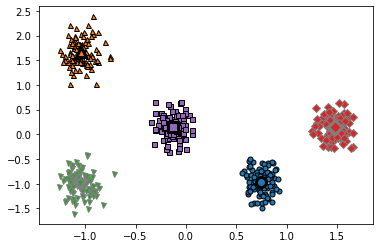

In [46]:
mglearn.discrete_scatter(WellSeparated['X'], WellSeparated['Y'], Kmeans_Clustering3.labels_ , s=5);
mglearn.discrete_scatter(Kmeans_Clustering3.cluster_centers_[:,0],
                        Kmeans_Clustering3.cluster_centers_[:,1], list(range(5)),
                        markeredgewidth=3, s= 10);

## silhouette_score 계산

In [50]:
print("Silhouette_score by K=8 -> {:.3f}".format(silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering1.labels_))) #8
print("Silhouette_score by K=10 -> {:.3f}".format(silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering2.labels_))) #10
print("Silhouette_score by K=5 -> {:.3f}".format(silhouette_score(WellSeparated[['X','Y']], Kmeans_Clustering3.labels_))) #5

Silhouette_score by K=8 -> 0.587
Silhouette_score by K=10 -> 0.455
Silhouette_score by K=5 -> 0.790


In [54]:
# K-Means Clustering 함수 실행 후 차트 가시화 -> 여기는 그냥 부가설명임(참고)
def k_Means_Plot(Data, Select_k, NAME, init_Method = 'k-means++', Num_Init = 10):
    Data2 = Data[['X','Y']]
    fig, axes = plt.subplots(1, (np.max(list(Select_k)) - np.min(list(Select_k)))+1, figsize = (15,4))
    
    for i in Select_k:
        Kmeans_Clustering4 = KMeans(n_clusters = i, init = init_Method, random_state = 2020, n_init = Num_Init)
        Kmeans_Clustering4.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering4.labels_, ax=axes[i-2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering4.cluster_centers_[:, 0],
                                Kmeans_Clustering4.cluster_centers_[:, 1],
                                list(range(i)),
                                markeredgewidth = 3,
                                ax = axes[i-2], s=10)
        
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering4.labels_), 3)
        
        axes[i-2].set_title(NAME + " / k = " + str(i) + ' / S_Score : ' + str(Score))

## 2. K-Means 알고리즘, 초기 값 설정의 중요성 예시

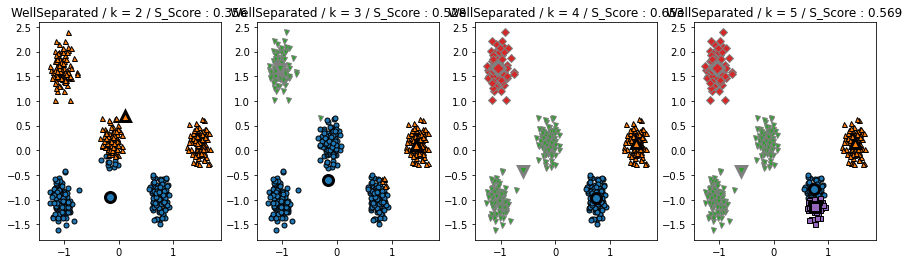

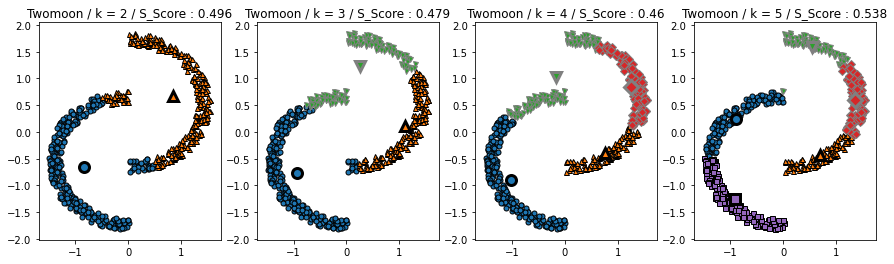

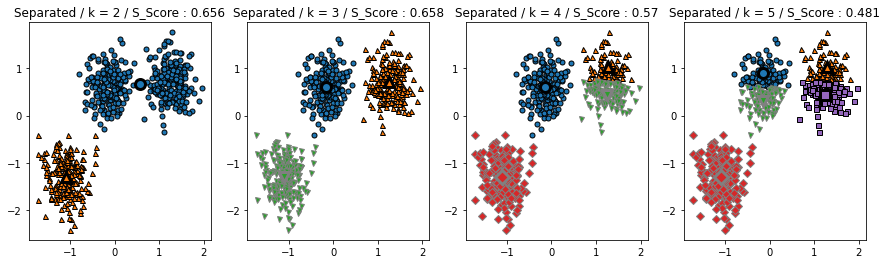

In [55]:
for i in range(0,3):
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                Select_k = range(2,6),
                NAME = list(Artificial_Dataset.keys())[i],
                init_Method = 'random', Num_Init = 1)

# 바로 밑의 결과를 봤을 때 5개를 했을때 정확하게 구별해야 하는데 random으로 지정했으므로
# 초기 값 설정이 잘못 되었음을 볼 수 있음.

# K-means는 반구 형태에서는 잘 작동하지 못함 -> 주로 구 형태에서만 잘 작동함

# 마지막의 경우에는 유일하게 잘 군집 되었다고 볼 수 있음.

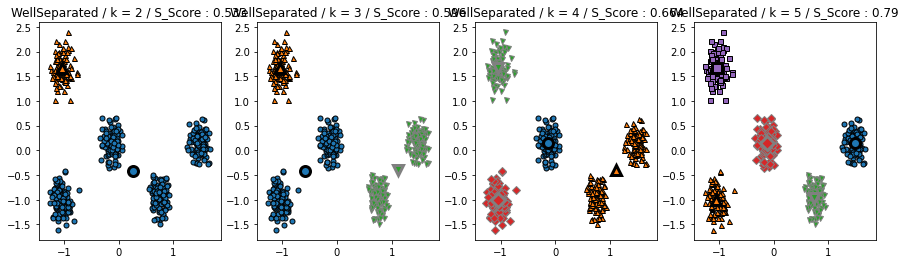

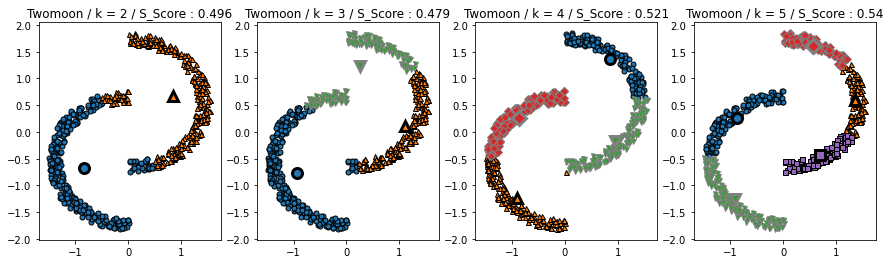

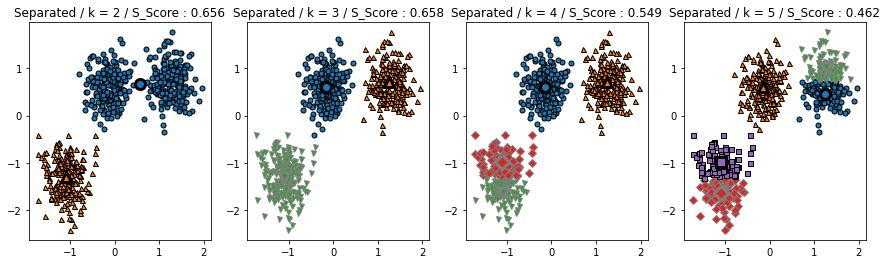

In [57]:
# Num_Init(반복횟수)를 10으로 변경

for i in range(0,3):
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                Select_k = range(2,6),
                NAME = list(Artificial_Dataset.keys())[i],
                init_Method = 'random', Num_Init = 10)

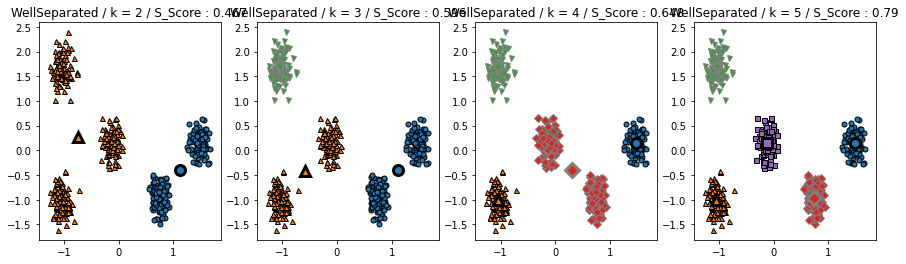

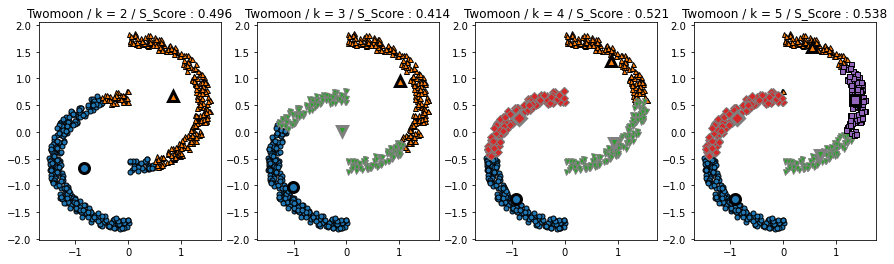

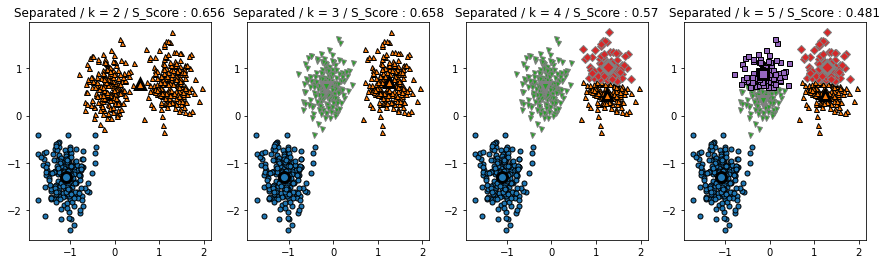

In [58]:
# Num_Init(반복횟수)를 1으로 변경 + Init_Method를 k-means++로 변경

for i in range(0,3):
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                Select_k = range(2,6),
                NAME = list(Artificial_Dataset.keys())[i],
                init_Method = 'k-means++', Num_Init = 1)

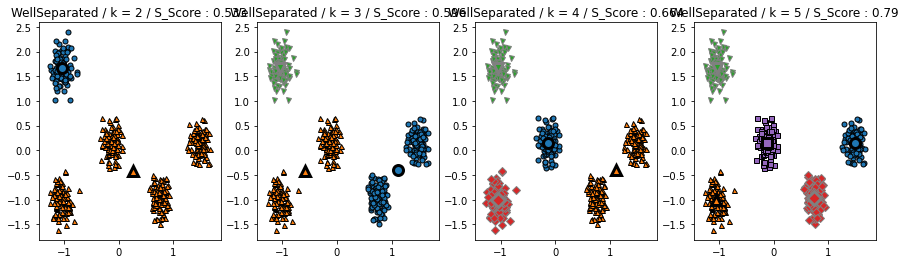

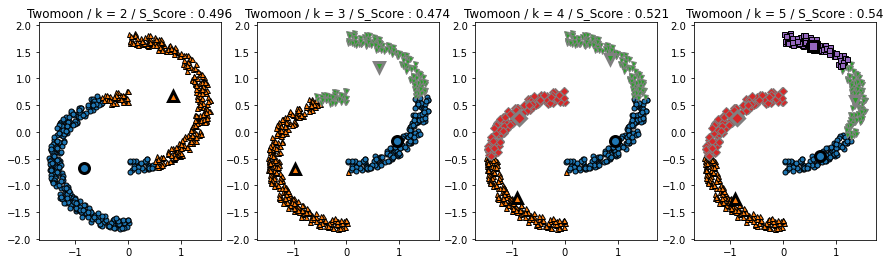

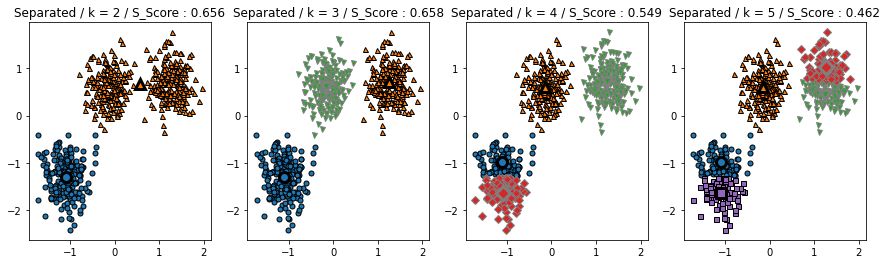

In [59]:
# Num_Init(반복횟수)를 10으로 변경 + Init_Method를 k-means++로 변경

for i in range(0,3):
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                Select_k = range(2,6),
                NAME = list(Artificial_Dataset.keys())[i],
                init_Method = 'k-means++', Num_Init = 10)

----
# Herarchical Clustering

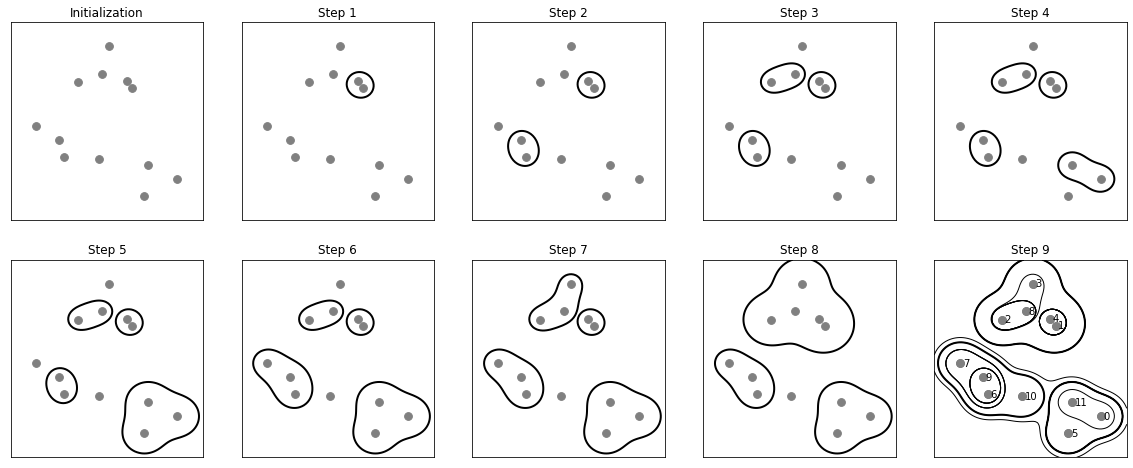

In [60]:
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

# AgglomerativeClustering

1) n_clusters -> default = 2 , None도 가능함 but distance_threshold is not None!

2) affinity -> 어떤 거리 지표를 사용할 것인지? 

3) linkage -> 군집간 유사도(군집간 거리 계산 방식)

In [61]:
H_Clustering = AgglomerativeClustering(n_clusters = 5, 
                affinity = 'euclidean', linkage = 'ward')
#linkage -> 군집간 거리 계산 방식

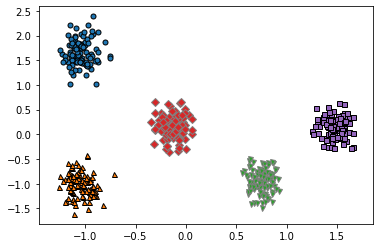

In [62]:
H_Clustering.fit(WellSeparated)

# AgglomerativeClustering에서는 predict만 없음! (fit_predict는 있음)
P_Labels = H_Clustering.fit_predict(WellSeparated)

# 위의 구문은 H_Clustering.fit(WellSeparated) 후에 H_Clustering.labels_하는 것과 동일

mglearn.discrete_scatter(WellSeparated['X'], WellSeparated['Y'], P_Labels, s = 5)

----
#### Well Separated Dataset을 통해 complete linkage에 대한 Dendrogram 시각화

In [63]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [64]:
Linkage_Matrix = linkage(np.array(WellSeparated[['X','Y']]), method = 'ward', metric = 'euclidean')

In [65]:
WellSeparated.shape

(500, 3)

In [68]:
Linkage_Matrix.shape

(499, 4)

----
# Linkage Metrix 예제

In [71]:
X = [[i] for i in [1, 1, 2, 2.5, 4]]

In [72]:
X

[[1], [1], [2], [2.5], [4]]

In [73]:
Z = linkage(np.array(X), 'ward', metric = 'euclidean')

In [74]:
Z

array([[0.        , 1.        , 0.        , 2.        ],
       [2.        , 3.        , 0.5       , 2.        ],
       [5.        , 6.        , 1.76776695, 4.        ],
       [4.        , 7.        , 3.00416378, 5.        ]])

### 첫째 행

0, 1-> 0번째 인덱스 값과 1번째 인덱스 값을 묶겠다.

0 -> 그 둘의 거리가 0이다

2 -> 그 군집 내의 있는 데이터의 수

### 두번째 행

2, 3 -> 2번째 인덱스 값과 2번째 인덱스 값을 묶겠다.

0.5 -> 그 둘의 거리가 0.5이다

2 -> 그 군집 내의 있는 데이터의 수

### 세번째 행

5, 6 -> 첫번째에서 묶은 것(5번째 인덱스), 두번째에서 묶은 것(6번째 인덱스)를 묶겠다

1.7677 -> 그 둘의 거리

4 -> 그 군집 내의 있는 데이터의 수

### 네번째 행

4, 7 -> 4번째 인덱스의 값과 세번째 행에서 묶인 것(7번째 인덱스)를 묶겠다

3.00416 -> 그 둘의 거리

5 -> 그 군집 내의 있는 데이터의 수

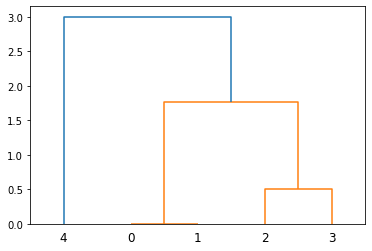

In [75]:
dendrogram(Z)
plt.show()

----
# 본론으로 돌아가서...

In [77]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data, 'complete')
    
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title("Hierarchical Clustering Dendrogram")
        plt.xlabel('sample index')
    
    else:
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('distance')
    
    plt.ylabel('distance')
    
    dendrogram(
        Linkage_Matrix,
        # 덴드로그램이 어려울때 사용 
        # -> 관측치가 엄청 많으면 오래 걸리기 때문에 간편하게 만들어줌(압축) 이걸 통해서
        truncate_mode = 'lastp',
        p = Num_of_p,
        leaf_rotation = 90,
        leaf_font_size = 12,
        color_threshold = 'default'
    )
    
    plt.show()

## 전체 관측치에 대해 모든 Leaf Node 생성

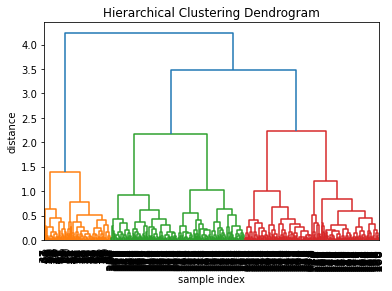

In [78]:
Fixed_Dendrogram(WellSeparated[['X','Y']], -1, True) # -1 : non_meaningful Value

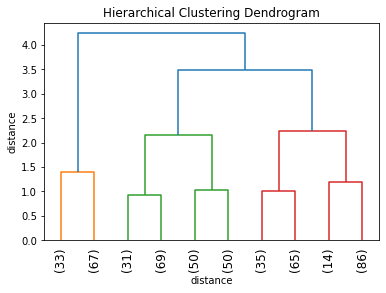

In [80]:
a = Fixed_Dendrogram(WellSeparated[['X','Y']], 10, False) 

In [81]:
# 여기는 참고로만 알아두기
def Hclust_Plot(Data, Select_k, NAME):
    Data2 = Data[['X','Y']]
    
    fig, axes = plt.subplots(1, (np.max(list(Select_k)) - np.min(list(Select_k)))+1, figsize = (15,4))
    
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters = i, linkage = 'complete')
        P_Labels = H_Clustering.fit_predict(Data2)
    
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i-2], s=5)
        
        axes[i-2].set_title("Data: " + NAME + ' / k = ' + str(i))
        
        Score = np.round(silhouette_score(Data2, P_Labels), 3)
        
        axes[i-2].set_title(NAME + ' / k = ' + str(i) + ' / S_Score : ' + str(Score))

# HC의 예측 결과 가시화

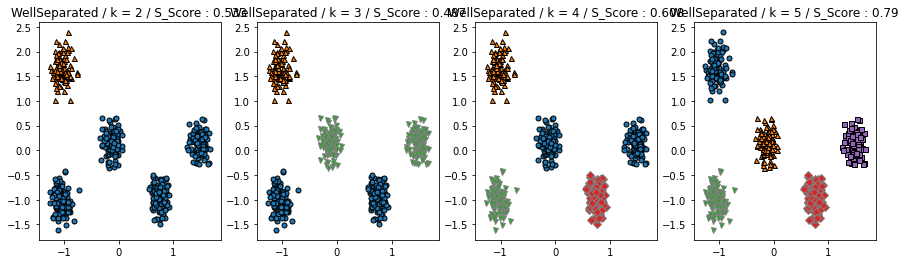

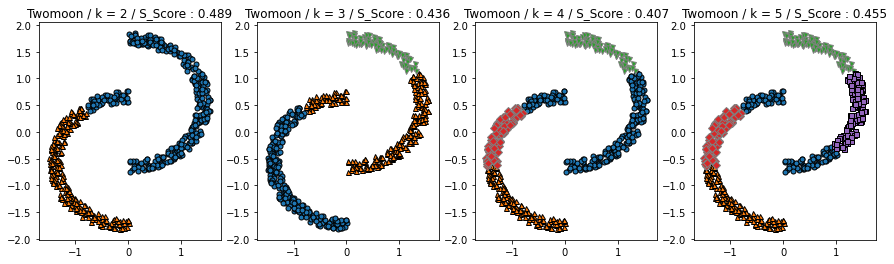

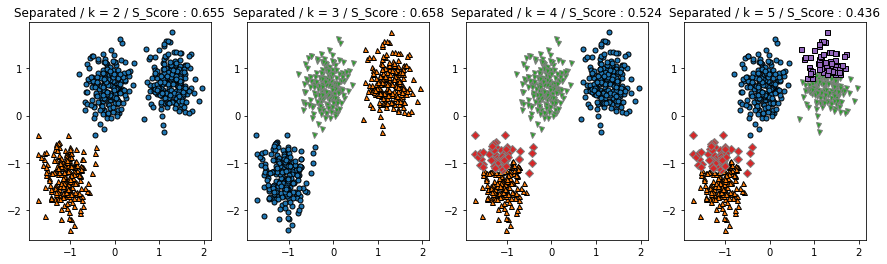

In [82]:
for i in range(0,3):
    Hclust_Plot(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
               range(2,6), list(Artificial_Dataset.keys())[i]
               )